## Written exercises - 1

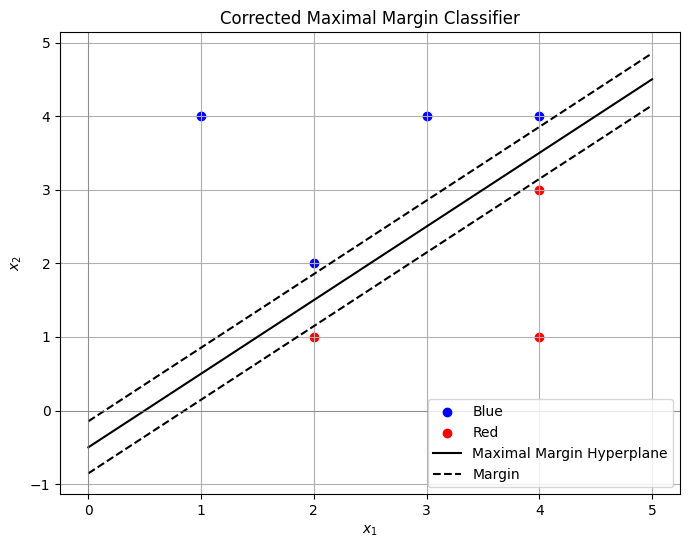

In [2]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Data points
blue_points = np.array([[3, 4], [2, 2], [4, 4], [1, 4]])
red_points = np.array([[2, 1], [4, 3], [4, 1]])
X = np.vstack((blue_points, red_points))
y = np.hstack((np.ones(len(blue_points)), -1 * np.ones(len(red_points))))  # Blue: 1, Red: -1

# Train an SVM for the maximal margin classifier
svm = SVC(kernel='linear', C=1e10)  # High C for hard margin SVM
svm.fit(X, y)

# Extract coefficients
beta_1, beta_2 = svm.coef_[0]
beta_0 = svm.intercept_[0]

# Function for the hyperplane
def hyperplane(x1):
    return -(beta_0 + beta_1 * x1) / beta_2

# Plotting
x1_vals = np.linspace(0, 5, 100)
x2_vals = hyperplane(x1_vals)

plt.figure(figsize=(8, 6))
# Plot data points
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Blue')
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Red')

# Plot hyperplane
plt.plot(x1_vals, x2_vals, color='black', label='Maximal Margin Hyperplane')

# Plot margins
margin = 1 / np.sqrt(beta_1**2 + beta_2**2)
plt.plot(x1_vals, hyperplane(x1_vals) + margin, 'k--', label='Margin')
plt.plot(x1_vals, hyperplane(x1_vals) - margin, 'k--')

# Add labels and legend
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend()
plt.title('Corrected Maximal Margin Classifier')
plt.grid(True)
plt.show()

In [3]:
print(beta_0, beta_1, beta_2)

0.9997070312500023 -1.999414062500001 1.9994140625


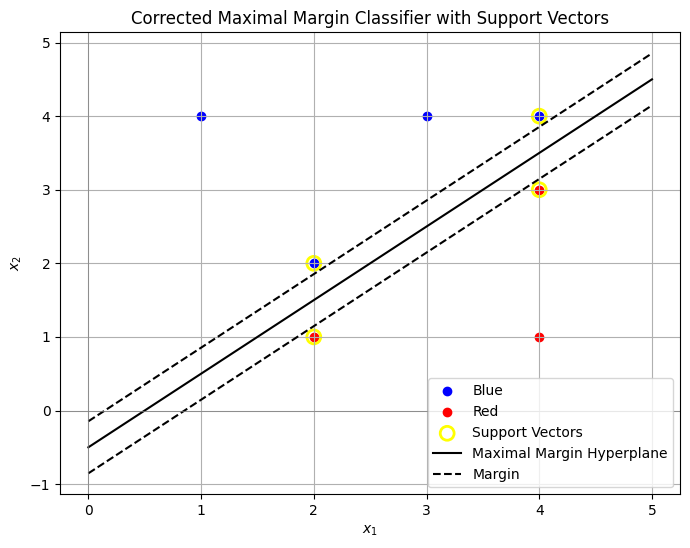

In [4]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Data points
blue_points = np.array([[3, 4], [2, 2], [4, 4], [1, 4]])
red_points = np.array([[2, 1], [4, 3], [4, 1]])
X = np.vstack((blue_points, red_points))
y = np.hstack((np.ones(len(blue_points)), -1 * np.ones(len(red_points))))  # Blue: 1, Red: -1

# Train an SVM for the maximal margin classifier
svm = SVC(kernel='linear', C=1e10)  # High C for hard margin SVM
svm.fit(X, y)

# Extract coefficients
beta_1, beta_2 = svm.coef_[0]
beta_0 = svm.intercept_[0]

# Function for the hyperplane
def hyperplane(x1):
    return -(beta_0 + beta_1 * x1) / beta_2

# Plotting
x1_vals = np.linspace(0, 5, 100)
x2_vals = hyperplane(x1_vals)

plt.figure(figsize=(8, 6))
# Plot data points
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Blue')
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Red')

# Highlight support vectors
support_vectors = svm.support_
plt.scatter(X[support_vectors, 0], X[support_vectors, 1], 
            s=100, edgecolors='yellow', facecolors='none', linewidth=2, label='Support Vectors')

# Plot hyperplane
plt.plot(x1_vals, x2_vals, color='black', label='Maximal Margin Hyperplane')

# Plot margins
margin = 1 / np.sqrt(beta_1**2 + beta_2**2)
plt.plot(x1_vals, hyperplane(x1_vals) + margin, 'k--', label='Margin')
plt.plot(x1_vals, hyperplane(x1_vals) - margin, 'k--')

# Add labels and legend
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend()
plt.title('Corrected Maximal Margin Classifier with Support Vectors')
plt.grid(True)
plt.show()

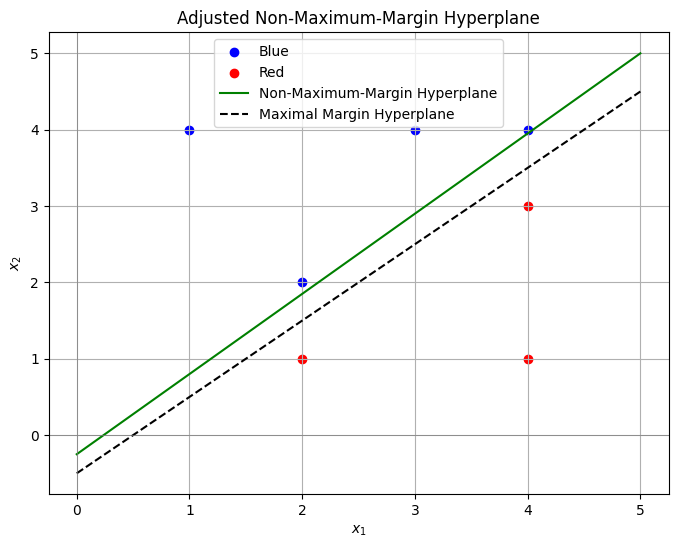

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Data points
blue_points = np.array([[3, 4], [2, 2], [4, 4], [1, 4]])
red_points = np.array([[2, 1], [4, 3], [4, 1]])
X = np.vstack((blue_points, red_points))
y = np.hstack((np.ones(len(blue_points)), -1 * np.ones(len(red_points))))  # Blue: 1, Red: -1

# Train an SVM for the maximal margin classifier
svm = SVC(kernel='linear', C=1e10)  # High C for hard margin SVM
svm.fit(X, y)

# Extract coefficients for the maximal margin hyperplane
beta_1, beta_2 = svm.coef_[0]
beta_0 = svm.intercept_[0]

# Define the new hyperplane (non-maximum-margin hyperplane)
new_beta_0 = 0.5  # Adjusted intercept
new_beta_1 = -2.1  # Adjusted x1 coefficient
new_beta_2 = 2.0  # Adjusted x2 coefficient

def new_hyperplane(x1):
    return -(new_beta_0 + new_beta_1 * x1) / new_beta_2

# Plotting
x1_vals = np.linspace(0, 5, 100)
x2_vals_new = new_hyperplane(x1_vals)

plt.figure(figsize=(8, 6))
# Plot data points
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Blue')
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Red')

# Plot new hyperplane
plt.plot(x1_vals, x2_vals_new, color='green', label='Non-Maximum-Margin Hyperplane')

# Plot original maximal margin hyperplane
def max_margin_hyperplane(x1):
    return -(beta_0 + beta_1 * x1) / beta_2

x2_vals_max_margin = max_margin_hyperplane(x1_vals)
plt.plot(x1_vals, x2_vals_max_margin, color='black', linestyle='--', label='Maximal Margin Hyperplane')

# Add labels and legend
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend()
plt.title('Adjusted Non-Maximum-Margin Hyperplane')
plt.grid(True)
plt.show()

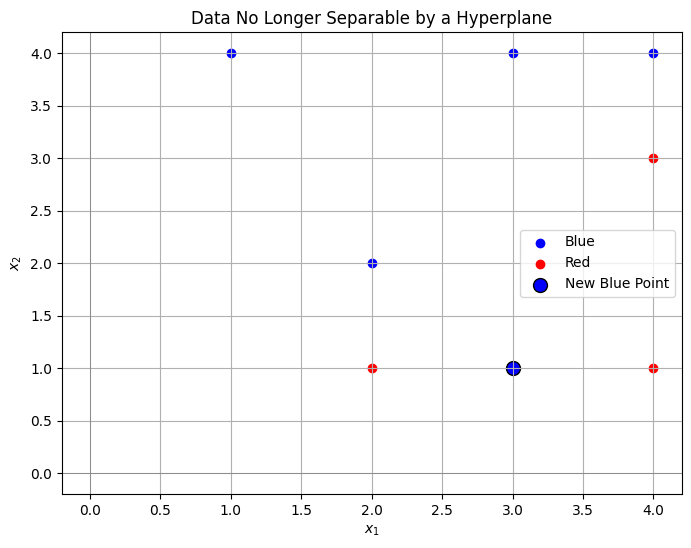

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
blue_points = np.array([[3, 4], [2, 2], [4, 4], [1, 4]])
red_points = np.array([[2, 1], [4, 3], [4, 1]])
X = np.vstack((blue_points, red_points))
y = np.hstack((np.ones(len(blue_points)), -1 * np.ones(len(red_points))))  # Blue: 1, Red: -1

# Add a new Blue point that makes the data non-linearly separable
new_point = np.array([[3, 1]])  # New Blue point
new_label = np.array([1])  # Label for the new point

# Update the data
X = np.vstack((X, new_point))
y = np.hstack((y, new_label))

# Plotting
plt.figure(figsize=(8, 6))
# Plot original points
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Blue')
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Red')

# Highlight the new point
plt.scatter(new_point[:, 0], new_point[:, 1], color='blue', edgecolors='black', s=100, label='New Blue Point')

# Add labels and legend
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend()
plt.title('Data No Longer Separable by a Hyperplane')
plt.grid(True)
plt.show()